In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = True)

#here using the MNIST dataset that is available in the scikit learn library

In [4]:
mnist_df = pd.concat([mnist['target'],mnist['data']], axis=1)
x  = mnist_df.drop('class', axis = 1)
y = mnist_df['class'].astype(float)
y = y[:50000]
x = x[:50000]
y = pd.get_dummies(y)

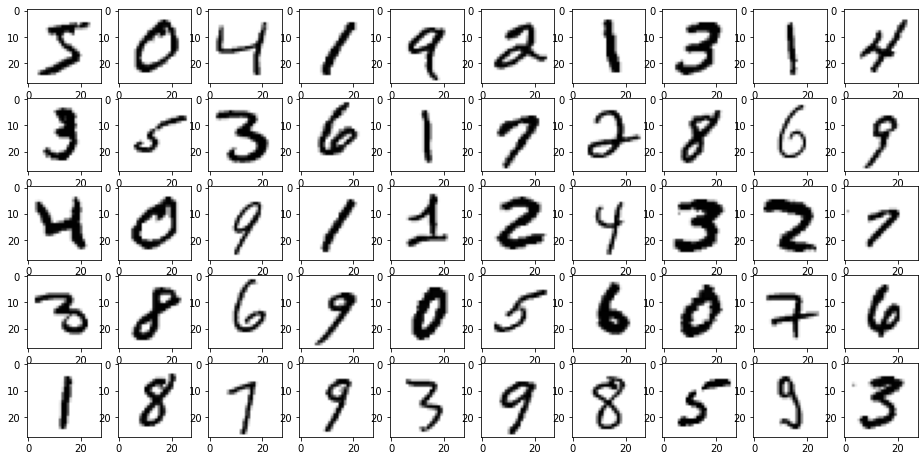

In [7]:
def plot_digit_image(image_data):
    image = np.array(image_data).reshape(28,28)
    plt.imshow(image, cmap = "binary")

fig = plt.figure(figsize = (16,16))

for idx in range(50):
    plt.subplot(10,10, idx+1)
    random_digit = x.iloc[idx]
    plot_digit_image(random_digit)

plt.show()

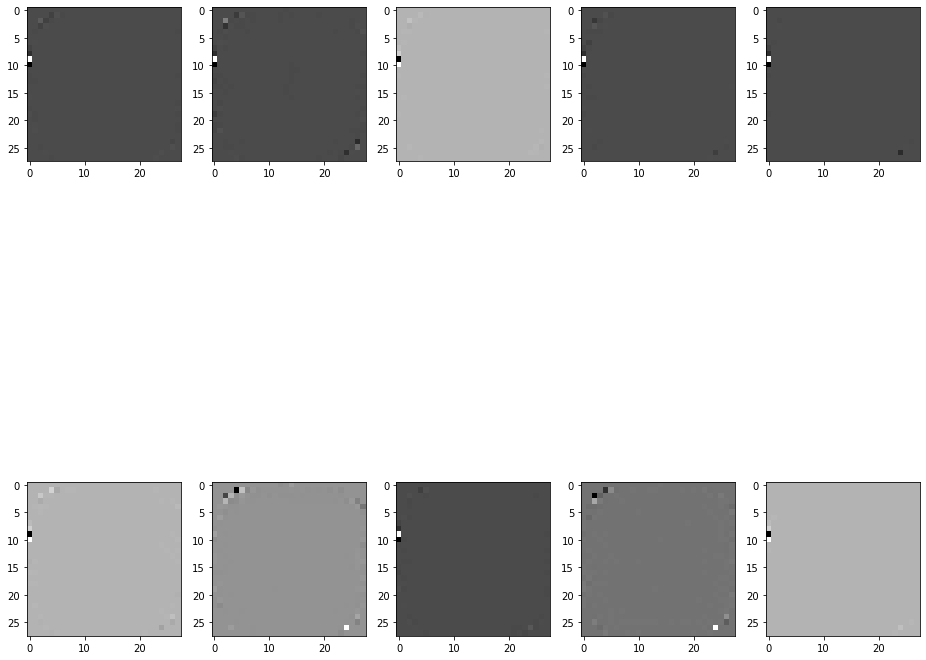

In [18]:
lsq = np.linalg.pinv(x) @ y

#Pixels set that are most informative for different digits

fig = plt.figure(figsize = (16,16))
for idx in range(10):
    plt.subplot(2,5, idx+1)
    random_digit = lsq[idx]
    plot_digit_image(random_digit)

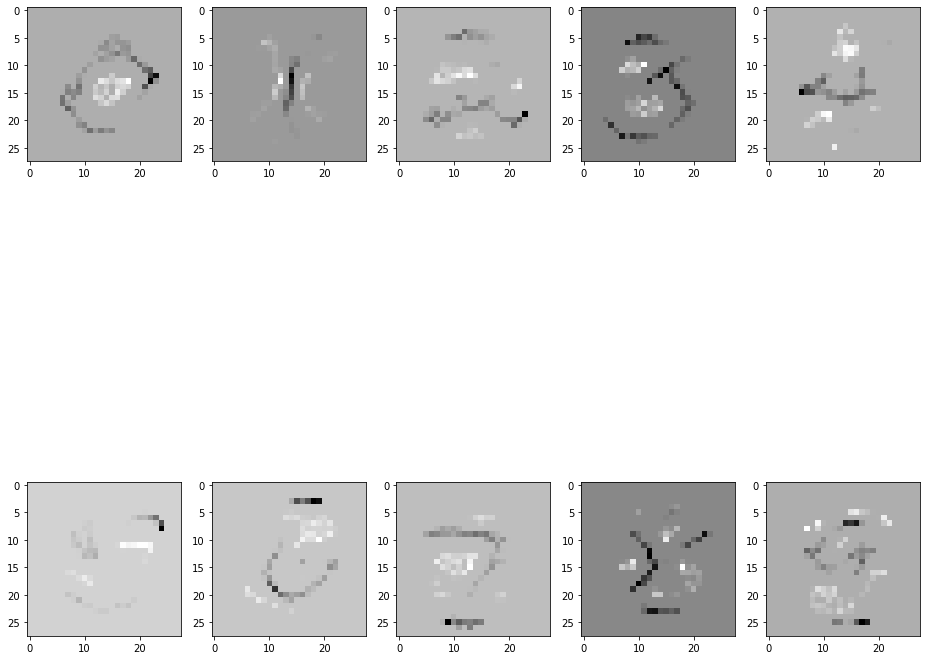

In [19]:
#Pixels set that are most informative for different digits using LASSO

Lasso_reg = linear_model.Lasso(alpha = 1.0, fit_intercept=False).fit(x, y)
Lasso = Lasso_reg.coef_

fig = plt.figure(figsize = (16,16))

for idx in range(10):
    plt.subplot(2,5, idx+1)
    random_digit = Lasso[idx,:]
    plot_digit_image(random_digit)